<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [3]:
# Load usefull packages
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

# Optional. Stimulation protocols to study various cell properties

<font size='3'>
Your task is to design and perform two different stimulation protocols that could be used to study the AP properties (e.g. amplitude, shape, rise-time, fall-time) and passive properties (e.g. input resistance and voltage base) of the cells you have in your group folder (.asc files). When defining the cells, for the passive properties use the parameters from tutorial 01 and for the active parameters use the MOD files used in tutorial 01. Don't include any biophysics on the cell axon.

<font size='3'>Run the protocols (saving the results to a csv file - you will need those for question 3), and plot soma voltages and the current applied. Explain the motivation behind your choice of protocols - why do you think these types of protocols are usefull when studying cell behavior?
    

# <font color= 'red'>Ex1:</font>. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the voltage base, firing frequency, spike count and after-hiperpolarization depth (AHP-depth) from the recordings that you can find in your folder group (.dat files). Extract the asked features from the one or several stimulation protocols that you think you can extract the features from.

<font size='3'>You can compute it as you wish, using eFEL, scipy.signal  or creating your own functions. <font color= 'red'>[1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").
    


## First we use the FirePattern recordings

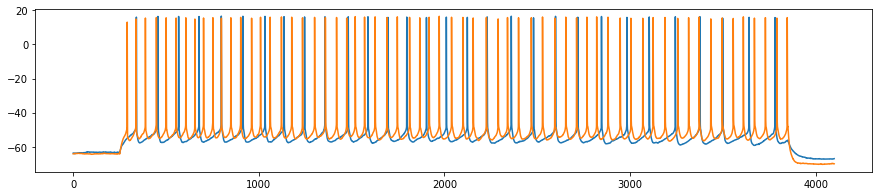

In [6]:
# Open and plot files

def get_data(fn):
    """Read  data file and formatfor plotting"""
    d = np.fromfile(fn)    
    return d[::2], d[1::2]

file_v1 = "data/exp_FirePattern_ch6_2048.dat"
file_v2 = "data/exp_FirePattern_ch6_2049.dat"


FILE_v1 = [file_v1, file_v2] 

plt.figure(figsize=(15,3))
for fv in FILE_v1:
    t, v = get_data(fv)
    plt.plot(t,v)

#### Extracting peaks, peak times and amplitude for one sweep using scipy.signal

Voltage peaks: [16.03125, 16.44999885559082, 16.431249618530273, 16.387500762939453, 16.631250381469727, 16.543750762939453, 16.475000381469727, 16.3125, 16.149999618530273, 16.231250762939453, 16.224998474121094, 16.256250381469727, 15.868749618530273, 16.081249237060547, 15.806251525878906, 16.04374885559082, 15.899999618530273, 16.162500381469727, 16.57499885559082, 15.625, 16.512500762939453, 15.975000381469727, 16.40625, 15.881250381469727, 16.13749885559082, 16.243751525878906, 16.30000114440918, 15.412500381469727, 15.918750762939453, 15.768749237060547]


Amplitudes of action potentials: [65.29375076 64.88124657 64.85000038 64.60000229 63.22500038 63.33125305
 63.19999886 63.83750153 63.48124886 62.39374924 63.69374847 63.51250267
 63.77499962 61.97499847 62.96250153 63.05000114 63.32499886 62.66250038
 62.73749733 63.04374695 62.14374924 62.48124886 63.06874847 63.21875191
 62.43749809 63.30625153 63.25000191 62.21875191 62.63125229 62.31249619] 


Times of peak occurences: [ 

Text(0, 0.5, 'voltage (mV)')

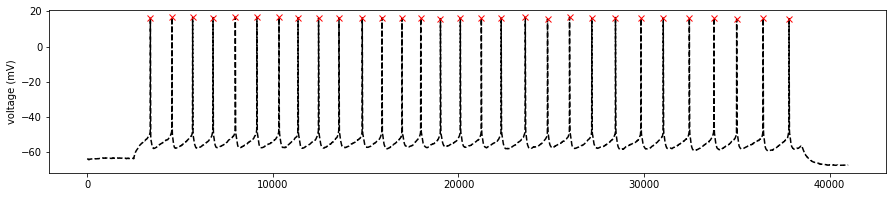

In [12]:
from scipy.signal import find_peaks, peak_prominences

t, v = get_data(file_v1)

# Amplitudes and peak locations
peaks_time, _ = find_peaks(v, prominence=1, height=-20)
amplitudes = peak_prominences(v, peaks_time, wlen=40)[0]

voltage_peaks = []
for x in peaks_time:
    volt_p = v[x]
    voltage_peaks.append(volt_p)
    
#Print results   
print("Voltage peaks: %s" %voltage_peaks)
print('\n')
print ("Amplitudes of action potentials: %s " % amplitudes)
print('\n')
print("Times of peak occurences: %s" % peaks_time)

# Plot
plt.figure(figsize=(15,3))
plt.plot(v,'k--')
plt.plot(peaks_time, v[peaks_time], 'rx')
plt.ylabel('voltage (mV)')

# <font color= 'red'>Ex2:</font> Combine Ex 1 and Ex 2

<font size='3'> Now let's do some electrophysiological analysis on both cells from your group folder that you have used in exercise 1. Examine your plots for the two protocols you have defined and select 2 or 3 eFeatures to help you identify differences between your two cells. Would you be able to classify the cells based on these eFeatures ? Explain your choice of features and your observations. <font color= 'red'>[2.5 pts]    
 

# <font color= 'red'>Ex3:</font> Genetic Algorith (Optimisation)

<font size='3'>Change the GA code in such a way that instead of the Spikecount feature, we search for a solution with AP amplitude of 96 for stim_amp = 0.5 nA and AP amplitdue of 85 for stim_amp = 0.05 nA.
    
<font size='3'>As you can see the optimisation algoithm explained in the tutorial is very simple and gives a lot of possible solutions. Explain and demonstrate how can you modify the GA optimisation to better contrain the returned solution. <font color= 'red'>[2 pts]
    